In [1]:
# importing packages and data set

import numpy as np
import pandas as pd
import re

microbe_dataSet = pd.read_csv('data/mimedb_microbes_v1.csv')

In [337]:
# predefined functions

def df_missingness(df):
    '''
    find the porportion of missingness of each column in the table.
    return the result as a series
    '''
    return df.isna().mean()




# Understanding Microbiome Data Set

## Data Schema:

| **Column Name**          | **Description**                                          |
|--------------------------|----------------------------------------------------------|
| **id**                   | Unique identifier for each record                        |
| **microbe_id**           | Identifier for the microbe                               |
| **name**                 | The name of the microbe                                  |
| **superkingdom**         | The broader superkingdom classification                  |
| **kingdom**              | The biological kingdom to which the microbe belongs      |
| **phylum**               | The phylum classification of the microbe                 |
| **klass**                | The class classification of the microbe                  |
| **order**                | The order classification of the microbe                  |
| **family**               | The family classification of the microbe                 |
| **genus**                | The genus classification of the microbe                  |
| **species**              | The species of the microbe                               |
| **strain**               | The strain or subtype of the microbe                     |
| **parent_id**            | Identifier for the parent record (if applicable)         |
| **level**                | Hierarchical level or classification                     |
| **ncbi_tax_id**          | The NCBI taxonomy identifier for the microbe             |
| **activity**             | Indicates if the microbe is active or inactive           |
| **gram**                 | Gram staining characteristic (positive or negative)      |
| **oxygen_requirement**   | The type of oxygen requirement for the microbe           |
| **metabolism**           | The metabolic characteristics of the microbe             |
| **shape**                | The shape of the microbe (e.g., cocci, bacilli)          |
| **mobility**             | Indicates if the microbe is mobile or immobile           |
| **flagella_presence**    | Indicates the presence or absence of flagella            |
| **number_of_membranes**  | Number of membranes the microbe has                      |
| **optimal_temperature**  | The optimal temperature for the microbe's growth         |
| **temperature_range**    | The temperature range within which the microbe can grow  |
| **habitat**              | The natural habitat of the microbe                       |
| **biotic_relationship**  | The type of biotic relationship the microbe has          |
| **cell_arrangement**     | The arrangement of cells in the microbe                  |
| **sporulation**          | Indicates if the microbe can form spores                 |
| **energy_source**        | The type of energy source used by the microbe            |
| **background**           | Additional background information about the microbe      |
| **health_type**          | Indicates the health implications (e.g., pathogenic)     |
| **evidence_type**        | The type of evidence supporting the microbe's classification |
| **data_source**          | The source of the data                                   |
| **export**               | Export status or related information                     |
| **human_pathogen**       | Indicates if the microbe is a human pathogen             |
| **genome_ids**           | Associated genome identifiers                            |
| **created_at**           | The date and time when the record was created            |
| **updated_at**           | The date and time when the record was last updated       |

(P.S Generated by ChatGPT)

## Evaluating the Degree of Missingness of each column

In [338]:
missing_eval = df_missingness(microbe_dataSet)
microDataSet_noMissing = np.array(missing_eval[missing_eval == 0].index)
microDataSet_absMissing = np.array(missing_eval[missing_eval == 1].index)


print('These columns have no missing value:')
print([column for column in microDataSet_noMissing])
print('')

print('Every single entity in these columns are missing:')
print([column for column in microDataSet_absMissing])

print('These columns have missing value in some degree(in ascending order):')
some_missing = missing_eval[(missing_eval != 1) & (missing_eval != 0)].sort_values()

# [print(column) for column in missing_eval[(missing_eval != 1) & (missing_eval != 0)].index]

print(some_missing)

These columns have no missing value:
['id', 'name', 'microbe_id', 'ncbi_tax_id', 'created_at', 'updated_at', 'superkingdom', 'export']

Every single entity in these columns are missing:
['background', 'health_type', 'evidence_type', 'parent_id', 'level']
These columns have missing value in some degree(in ascending order):
phylum                 0.000460
klass                  0.002300
order                  0.002760
family                 0.007360
genus                  0.017939
genome_ids             0.103956
species                0.147654
oxygen_requirement     0.324287
gram                   0.583717
strain                 0.648114
shape                  0.688132
metabolism             0.709292
habitat                0.854186
temperature_range      0.855106
biotic_relationship    0.857866
mobility               0.858326
number_of_membranes    0.863845
flagella_presence      0.871665
kingdom                0.874425
sporulation            0.885005
cell_arrangement       0.895124
opti

TODO: It seems like a good candidate is: oxygen_requirement & gram

# Data Cleaning

In [355]:
def cleaning_oxy_req(ele):
    '''
    cleaned the input ele
    '''
    regex_pattern = r"/|;|,"

    if isinstance(ele, str):
        
        ele = re.split(regex_pattern, ele)[0]
        ele = ele.replace('\xa0', ' ')
        if ele == 'Nanaerobe':
            return 'Anaerobe'
        elif ele == 'Obligate anaerobe':
            return 'Anaerobe'
        elif ele == 'Facultatively anaerobe':
            return 'Facultative anaerobe'
        elif ele == 'Microaerophile':
            return 'Microaerophilic'
        else:
            return ele
    else:
        return ele

In [356]:
# removing columns that has 100 percent missnig value
cleaned_microbe_dataSet = microbe_dataSet.drop(columns=microDataSet_absMissing)

# reduing the dimension of the oxygen_requirements types
# there is correct type and take the dominate type
cleaned_microbe_dataSet['oxygen_requirement'] = cleaned_microbe_dataSet['oxygen_requirement'].apply(cleaning_oxy_req)
cleaned_microbe_dataSet

,id,name,microbe_id,species,kingdom,phylum,ncbi_tax_id,activity,gram,oxygen_requirement,...,habitat,biotic_relationship,cell_arrangement,sporulation,energy_source,superkingdom,data_source,export,human_pathogen,genome_ids
0,2,Micromonospora aurantiaca ATCC 27029,MMDBm0000002,Micromonospora aurantiaca,NaN,Actinobacteria,644283,Production (export),Positive,Aerobe,...,Multiple,Free living,NaN,Sporulating,NaN,Bacteria,NaN,1,NaN,275
1,3,Acidaminococcus fermentans DSM 20731,MMDBm0000003,Acidaminococcus,NaN,Firmicutes,591001,NaN,Negative,Anaerobe,...,Multiple,Free living,NaN,Nonsporulating,NaN,Bacteria,NaN,1,NaN,26
2,4,Acidaminococcus intestini RyC-MR95,MMDBm0000004,Acidaminococcus intestini,NaN,Firmicutes,568816,NaN,Negative,Anaerobe,...,NaN,NaN,NaN,NaN,NaN,Bacteria,NaN,1,NaN,36
3,6,Acinetobacter baumannii,MMDBm0000006,Acinetobacter baumannii,NaN,Proteobacteria,470,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bacteria,NaN,1,NaN,1096
4,7,Acinetobacter pittii ANC 4052,MMDBm0000007,Acinetobacter pittii,NaN,Proteobacteria,1217689,NaN,Negative,Aerobe,...,NaN,NaN,NaN,NaN,NaN,Bacteria,NaN,1,NaN,2443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,881928,Halococcus morrhuae DSM 1307,MMDBm0881919,Halococcus morrhuae,NaN,Euryarchaeota,931277,NaN,Negative,Aerobe,...,NaN,NaN,NaN,NaN,NaN,Archaea,NaN,1,NaN,343; 1459
2170,881944,Methanomassiliicoccus luminyensis,MMDBm0881935,Methanomassiliicoccus luminyensis,NaN,Candidatus thermoplasmatota,1080712,NaN,NaN,Anaerobe,...,NaN,NaN,NaN,NaN,NaN,Archaea,NaN,1,NaN,1844; 1845
2171,882007,Halococcus morrhuae,MMDBm0881997,Halococcus morrhuae,NaN,Euryarchaeota,2250,NaN,NaN,Aerobe,...,NaN,NaN,NaN,NaN,NaN,Archaea,NaN,1,NaN,1914; 1915
2172,882192,Candidatus Nitrososphaera gargensis,MMDBm0882180,Candidatus Nitrososphaera gargensis,NaN,Nitrososphaerota,497727,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Archaea,NaN,1,NaN,NaN


# Imputation

## Naive Approach: Probabilistic Imputation

# Imputation Evaluation

<AxesSubplot:>

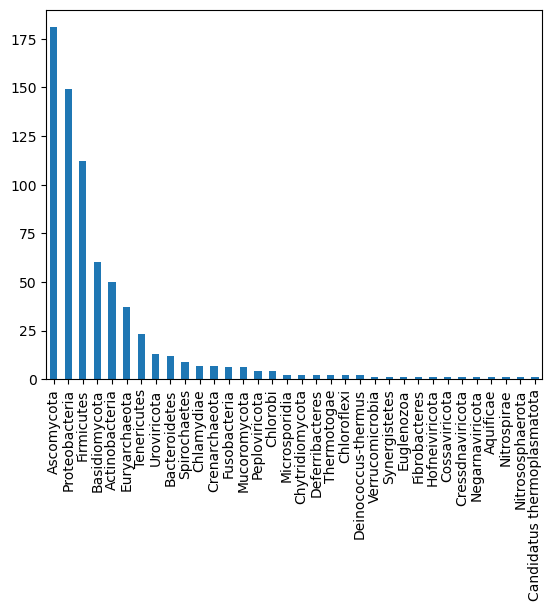

In [386]:
cleaned_microbe_dataSet[cleaned_microbe_dataSet['oxygen_requirement'].isna()]['phylum'].value_counts().plot(kind='bar')

In [342]:
CONSIDER_COLUMN = ['id', 'species', 'phylum', 'gram',  'klass', 'order', 'family', 'genus', 'superkingdom']

In [343]:
microbe_dataSet['data_source']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2169    NaN
2170    NaN
2171    NaN
2172    NaN
2173    NaN
Name: data_source, Length: 2174, dtype: object

In [344]:
microbe_dataSet['gram'].value_counts()

Positive                                      461
Negative                                      419
Uncharacterized                                10
Variable                                        7
Structurally positive but stains negative       6
Negative due to the absence of a cell wall      2
Name: gram, dtype: int64

In [345]:
microbe_dataSet['activity'].isna().sum()

2129

In [346]:
microbe_dataSet.isna().mean().sort_values()

# when impute the species
# imputation plan 1: use all the ranks except strain
# imputation plan 2: use all the ranks with strain
# compare to see if they are the same
# send to lucy


# # species
# # oxygen_requirement

# after impute species with, 

id                     0.000000
superkingdom           0.000000
created_at             0.000000
export                 0.000000
ncbi_tax_id            0.000000
updated_at             0.000000
name                   0.000000
microbe_id             0.000000
phylum                 0.000460
klass                  0.002300
order                  0.002760
family                 0.007360
genus                  0.017939
genome_ids             0.103956
species                0.147654
oxygen_requirement     0.324287
gram                   0.583717
strain                 0.648114
shape                  0.688132
metabolism             0.709292
habitat                0.854186
temperature_range      0.855106
biotic_relationship    0.857866
mobility               0.858326
number_of_membranes    0.863845
flagella_presence      0.871665
kingdom                0.874425
sporulation            0.885005
cell_arrangement       0.895124
optimal_temperature    0.931923
energy_source          0.963661
human_pa

In [347]:
microbe_dataSet['shape'].isna().mean()#.columns

0.6881324747010119

In [348]:
# data cleaning stage

# selecting specific columns
cleaned_microData = microbe_dataSet[CONSIDER_COLUMN]

# query neccessary columns
cleaned_microData = cleaned_microData[(cleaned_microData['gram'] != 'Uncharacterized') &
                                      (cleaned_microData['gram'] != 'Variable')]

# converting column into binary data type
cleaned_microData['binary_gram'] = (cleaned_microData['gram']
                                    .apply(lambda status: status if status in ['Positive', 'Negative', np.NaN] else 'Negative'))

cleaned_microData['binary_gram'].isna().sum()

1269

data imputation
- missing value, but have the correct something where

- missing value, we don't have the correct case
    - reseracher, don't care


impute data with correct answer
a model that has shows the imputated data has high accuracy on the family type -> the imputation is successful 

In [349]:
cleaned_microData#['family'].value_counts().unique()

,id,species,phylum,gram,klass,order,family,genus,superkingdom,binary_gram
0,2,Micromonospora aurantiaca,Actinobacteria,Positive,Actinobacteria,Actinomycetales,Micromonosporaceae,Micromonospora,Bacteria,Positive
1,3,Acidaminococcus,Firmicutes,Negative,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,Bacteria,Negative
2,4,Acidaminococcus intestini,Firmicutes,Negative,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,Bacteria,Negative
3,6,Acinetobacter baumannii,Proteobacteria,NaN,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Bacteria,NaN
4,7,Acinetobacter pittii,Proteobacteria,Negative,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Bacteria,Negative
...,...,...,...,...,...,...,...,...,...,...
2169,881928,Halococcus morrhuae,Euryarchaeota,Negative,Halobacteria,Halobacteriales,Halobacteriaceae,Halococcus,Archaea,Negative
2170,881944,Methanomassiliicoccus luminyensis,Candidatus thermoplasmatota,NaN,Thermoplasmata,Methanomassiliicoccales,Methanomassiliicoccaceae,Methanomassiliicoccus,Archaea,NaN
2171,882007,Halococcus morrhuae,Euryarchaeota,NaN,Halobacteria,Halobacteriales,Halococcaceae,Halococcus,Archaea,NaN
2172,882192,Candidatus Nitrososphaera gargensis,Nitrososphaerota,NaN,Nitrososphaeria,Nitrososphaerales,Nitrososphaeraceae,Nitrososphaera,Archaea,NaN


In [350]:
cleaned_microData['family'].isna().mean()

0.007417709782104775

In [351]:
for i in cleaned_microData.columns:
    print(i, len(cleaned_microData[i].unique()))



id 2157
species 1105
phylum 36
gram 5
klass 80
order 159
family 297
genus 557
superkingdom 4
binary_gram 3


In [352]:
cleaned_microData['phylum'].unique()

array(['Actinobacteria', 'Firmicutes', 'Proteobacteria',
       'Verrucomicrobia', 'Bacteroidetes', 'Euryarchaeota',
       'Synergistetes', 'Fusobacteria', 'Spirochaetes',
       'Deinococcus-thermus', 'Fibrobacteres', 'Chlorobi', 'Chloroflexi',
       'Tenericutes', 'Crenarchaeota', 'Thermotogae', 'Ascomycota',
       'Euglenozoa', 'Deferribacteres', 'Chlamydiae', 'Basidiomycota',
       'Chytridiomycota', 'Microsporidia', 'Mucoromycota', nan,
       'Peploviricota', 'Uroviricota', 'Hofneiviricota', 'Cossaviricota',
       'Cressdnaviricota', 'Negarnaviricota', 'Aquificae', 'Nitrospirae',
       'Planctomycetes', 'Candidatus thermoplasmatota',
       'Nitrososphaerota'], dtype=object)

1. everything, expect the species
2. everything, expect the species and genus
3. find withone is better
4. after impute gram type, do a follow up species prediction using cross validation


In [353]:
cleaned_microData['binary_gram'].isna().mean()

0.588317107093185

<AxesSubplot:>

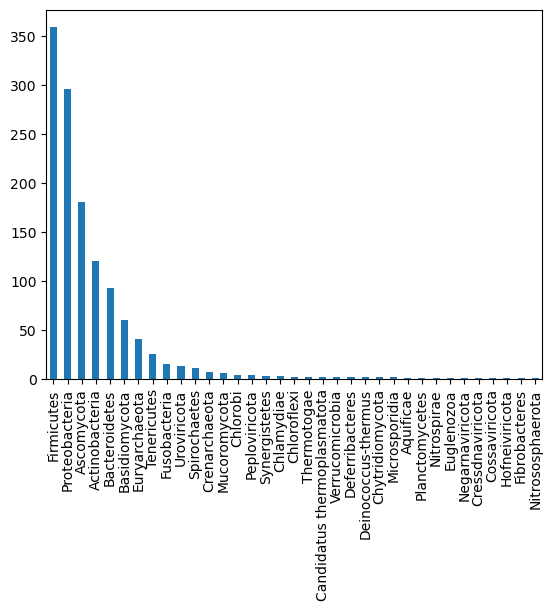

In [354]:
cleaned_microData[cleaned_microData['binary_gram'].isna()]['phylum'].value_counts().plot(kind='bar')